## Annual Means

This notebook calculates the means of different pollutants across different time periods, in order to compare with the recommended limits.

The data is read from the corresponding csv file images/<year>_7cities.csv. This is AQI data that has not been filtered 
    
The main thing to look at here is the table of means and means/recommended limits

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-bright')

In [3]:
year = 2020
df = pd.read_csv(f'data/{year}_7cities.csv')

## A quick look at the data, make sure we understand what's what

In [44]:
df.describe()

,Unnamed: 0,count,min,max,median,variance
count,7601.000000,7601.000000,7601.000000,7601.000000,7601.000000,7.601000e+03
mean,23984.933430,240.115116,10.097619,127.783936,32.037087,8.903786e+03
std,13729.674807,252.138874,19.757924,192.520101,43.235384,3.784529e+04
min,2977.000000,2.000000,0.100000,1.000000,0.400000,0.000000e+00
25%,6892.000000,72.000000,0.300000,24.300000,4.900000,2.123800e+02
50%,26871.000000,177.000000,1.300000,65.400000,9.900000,9.360800e+02
75%,37973.000000,246.000000,7.300000,135.000000,52.000000,3.935120e+03
max,43381.000000,946.000000,158.000000,999.000000,392.000000,1.273200e+06


In [45]:
df.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance
0,2977,28/02/2020,IN,Hyderabad,no2,96,3.0,32.7,12.2,405.29
1,2978,09/03/2020,IN,Hyderabad,no2,120,0.3,27.1,8.2,403.07
2,2979,06/04/2020,IN,Hyderabad,no2,95,0.1,31.2,6.1,848.08
3,2980,11/04/2020,IN,Hyderabad,no2,113,0.2,500.0,7.4,43973.00
4,2981,08/05/2020,IN,Hyderabad,no2,120,0.8,23.1,7.8,492.57


In [46]:
df.dtypes

Unnamed: 0      int64
Date           object
Country        object
City           object
Specie         object
count           int64
min           float64
max           float64
median        float64
variance      float64
dtype: object

OK! Most of the columns seem fine, but the Date is listed as an object. Let's fix this, so we can use this data correctly.

We will want to group the data according to month, so let's also create the corresponding columns.

In [4]:
df.Date = pd.to_datetime(df.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df['month_num'] = pd.DatetimeIndex(df['Date']).month
df['month_name'] = df.Date.dt.month_name()
print(df.dtypes)

Unnamed: 0             int64
Date          datetime64[ns]
Country               object
City                  object
Specie                object
count                  int64
min                  float64
max                  float64
median               float64
variance             float64
month_num              int64
month_name            object
dtype: object


In [48]:
df.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance,month_num,month_name
0,2977,2020-02-28,IN,Hyderabad,no2,96,3.0,32.7,12.2,405.29,2,February
1,2978,2020-03-09,IN,Hyderabad,no2,120,0.3,27.1,8.2,403.07,3,March
2,2979,2020-04-06,IN,Hyderabad,no2,95,0.1,31.2,6.1,848.08,4,April
3,2980,2020-04-11,IN,Hyderabad,no2,113,0.2,500.0,7.4,43973.00,4,April
4,2981,2020-05-08,IN,Hyderabad,no2,120,0.8,23.1,7.8,492.57,5,May


In [5]:
print(df.shape)
# just keep 2019 data, discard everything else
df = df[df['Date'].dt.year == year]
print(df.shape)

(7601, 12)
(7518, 12)


In [50]:
df.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance,month_num,month_name
0,2977,2020-02-28,IN,Hyderabad,no2,96,3.0,32.7,12.2,405.29,2,February
1,2978,2020-03-09,IN,Hyderabad,no2,120,0.3,27.1,8.2,403.07,3,March
2,2979,2020-04-06,IN,Hyderabad,no2,95,0.1,31.2,6.1,848.08,4,April
3,2980,2020-04-11,IN,Hyderabad,no2,113,0.2,500.0,7.4,43973.00,4,April
4,2981,2020-05-08,IN,Hyderabad,no2,120,0.8,23.1,7.8,492.57,5,May


In [23]:
#just to make this generic
cities = df.City.unique()
pollutants = df.Specie.unique()

print(cities)
print(pollutants)

## annual means
## using 'annual mean' unless otherwise specified
pollutant_am_who = {}
pollutant_am_who['co']   = None
pollutant_am_who['no2']  = 40
pollutant_am_who['o3']   = None
pollutant_am_who['pm10'] = 20
pollutant_am_who['pm25'] = 10
pollutant_am_who['so2']  = None

## annual in 'industrial, residential, rural, others' areas
pollutant_am_naaqs = {}
pollutant_am_naaqs['co']   = None
pollutant_am_naaqs['no2']  = 40
pollutant_am_naaqs['o3']   = None
pollutant_am_naaqs['pm10'] = 60
pollutant_am_naaqs['pm25'] = 40
pollutant_am_naaqs['so2']  = 40

## 24-hour means unless otherwise specified. Using 8-hour as a proxy when unavailable
pollutant_24h_who = {}
pollutant_24h_who['co']   = None
pollutant_24h_who['no2']  = None
pollutant_24h_who['o3']   = 100 # 8-hour
pollutant_24h_who['pm10'] = 50
pollutant_24h_who['pm25'] = 25
pollutant_24h_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_24h_naaqs = {}
pollutant_24h_naaqs['co']   = 2 # 8-hour
pollutant_24h_naaqs['no2']  = 80
pollutant_24h_naaqs['o3']   = 100 # 8-hour
pollutant_24h_naaqs['pm10'] = 100
pollutant_24h_naaqs['pm25'] = 60
pollutant_24h_naaqs['so2']  = 80


['Hyderabad' 'Delhi' 'Chennai' 'Visakhapatnam' 'Mumbai' 'Bengaluru'
 'Kolkata']
['no2' 'pm25' 'pm10' 'o3' 'so2' 'co']


In [67]:
# We use the median as a standin for the mean per day
# also calculate the annual mean of daily medians
for i, c in enumerate(cities):
    d = df[(df.City == c)]
    for j, p in enumerate(pollutants):
        d1 = d[(d.Specie == p)]
        #print(type(d1.median))
        #print(d1['median'])
        annual_mean = d1['median'].mean()
        print(f'{c}\t{p}\t{annual_mean:.2f}\t{pollutant_am_who[p]}\t{pollutant_am_naaqs[p]}')

Hyderabad	no2	10.00	40	40
Hyderabad	pm25	96.96	10	40
Hyderabad	pm10	58.74	20	60
Hyderabad	o3	10.23	None	None
Hyderabad	so2	2.70	None	40
Hyderabad	co	4.21	None	None
Delhi	no2	13.16	40	40
Delhi	pm25	145.74	10	40
Delhi	pm10	98.76	20	60
Delhi	o3	11.61	None	None
Delhi	so2	6.04	None	40
Delhi	co	8.61	None	None
Chennai	no2	3.57	40	40
Chennai	pm25	70.22	10	40
Chennai	pm10	38.99	20	60
Chennai	o3	12.61	None	None
Chennai	so2	2.68	None	40
Chennai	co	6.95	None	None
Visakhapatnam	no2	12.64	40	40
Visakhapatnam	pm25	84.31	10	40
Visakhapatnam	pm10	56.68	20	60
Visakhapatnam	o3	11.18	None	None
Visakhapatnam	so2	3.74	None	40
Visakhapatnam	co	5.70	None	None
Mumbai	no2	9.37	40	40
Mumbai	pm25	93.91	10	40
Mumbai	pm10	64.70	20	60
Mumbai	o3	9.07	None	None
Mumbai	so2	4.09	None	40
Mumbai	co	5.10	None	None
Bengaluru	no2	8.12	40	40
Bengaluru	pm25	83.87	10	40
Bengaluru	pm10	51.37	20	60
Bengaluru	o3	14.11	None	None
Bengaluru	so2	3.73	None	40
Bengaluru	co	7.00	None	None
Kolkata	no2	12.58	40	40
Kolkata	pm25	107.15	10	40

In [48]:
# We don't have annual levels for O3 and CO. NO2 and SO2 are comfortably within limits. So let's just focus on PM2.5 and PM10
# We use the median as a standin for the mean per day
# also calculate the annual mean of daily medians

## dictionary with value means. The keys are (city, pollutant) and also (pollutant, city)
annual_means_pollutants = {}

## dictionary with value list of means (pm25 then pm10). Keys are the city
am_by_city = {c:[] for c in cities}

for j, p in enumerate(['pm25', 'pm10']):
    d = df[(df.Specie == p)]
    for i, c in enumerate(cities):    
        d1 = d[(d.City == c)]
        #print(type(d1.median))
        #print(d1['median'])
        annual_mean = d1['median'].mean()
        print(f'{c:10}\t{p}\t{annual_mean:6.2f}\t{pollutant_am_who[p]} {annual_mean/pollutant_am_who[p]:5.2f}\t{pollutant_am_naaqs[p]} {annual_mean/pollutant_am_naaqs[p]:2.2f}')
        annual_means_pollutants[(c, p)] = annual_mean
        annual_means_pollutants[(p, c)] = annual_mean
        am_by_city[c].append(annual_mean)
    print()

print(annual_means_pollutants)
print(am_by_city)

{'Hyderabad': [], 'Delhi': [], 'Chennai': [], 'Visakhapatnam': [], 'Mumbai': [], 'Bengaluru': [], 'Kolkata': []}
Hyderabad 	pm25	 96.96	10  9.70	40 2.42
Delhi     	pm25	145.74	10 14.57	40 3.64
Chennai   	pm25	 70.22	10  7.02	40 1.76
Visakhapatnam	pm25	 84.31	10  8.43	40 2.11
Mumbai    	pm25	 93.91	10  9.39	40 2.35
Bengaluru 	pm25	 83.87	10  8.39	40 2.10
Kolkata   	pm25	107.15	10 10.71	40 2.68

Hyderabad 	pm10	 58.74	20  2.94	60 0.98
Delhi     	pm10	 98.76	20  4.94	60 1.65
Chennai   	pm10	 38.99	20  1.95	60 0.65
Visakhapatnam	pm10	 56.68	20  2.83	60 0.94
Mumbai    	pm10	 64.70	20  3.24	60 1.08
Bengaluru 	pm10	 51.37	20  2.57	60 0.86
Kolkata   	pm10	 64.64	20  3.23	60 1.08

{('Hyderabad', 'pm25'): 96.96132596685082, ('pm25', 'Hyderabad'): 96.96132596685082, ('Delhi', 'pm25'): 145.7403314917127, ('pm25', 'Delhi'): 145.7403314917127, ('Chennai', 'pm25'): 70.21546961325967, ('pm25', 'Chennai'): 70.21546961325967, ('Visakhapatnam', 'pm25'): 84.30898876404494, ('pm25', 'Visakhapatnam'): 84.30

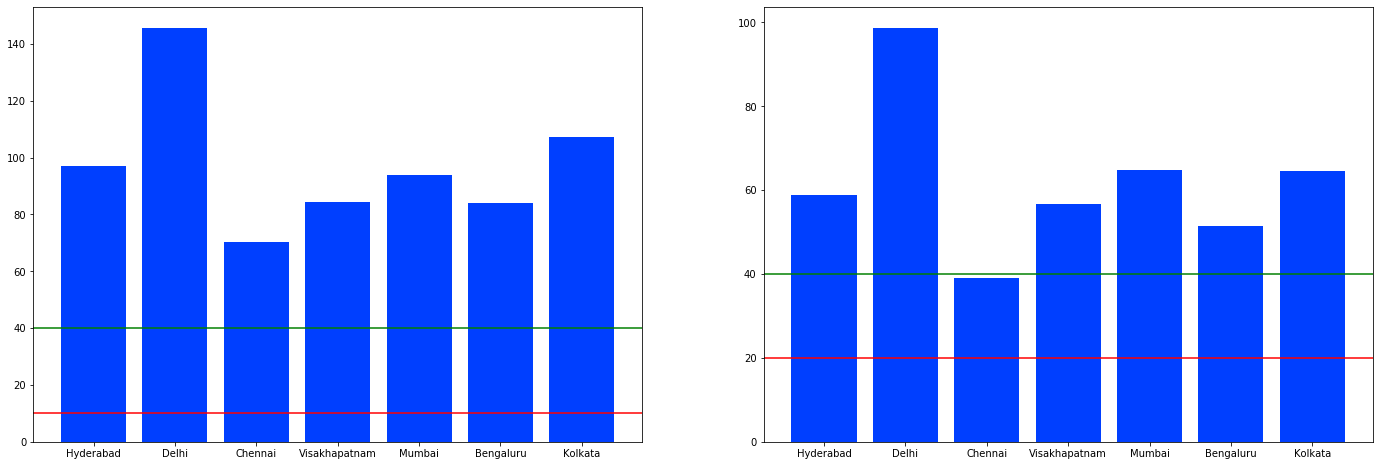

In [61]:
# plot 'em!

mean_pm25 = [v[0] for v in am_by_city.values()]
mean_pm10 = [v[1] for v in am_by_city.values()]
# just s we have the right sequence...
cities_in = [k for k in am_by_city.keys()]


fig, ax = plt.subplots(1, 2, figsize=(24, 8))
ax[0].bar(cities_in, mean_pm25)
ax[0].axhline(y=pollutant_am_who['pm25'], c='r')
ax[0].axhline(y=pollutant_am_naaqs['pm25'], c='g')
ax[1].bar(cities_in, mean_pm10)
ax[1].axhline(y=pollutant_am_who['pm10'], c='r')
ax[1].axhline(y=pollutant_am_naaqs['pm25'], c='g')
plt.show()
plt.close()

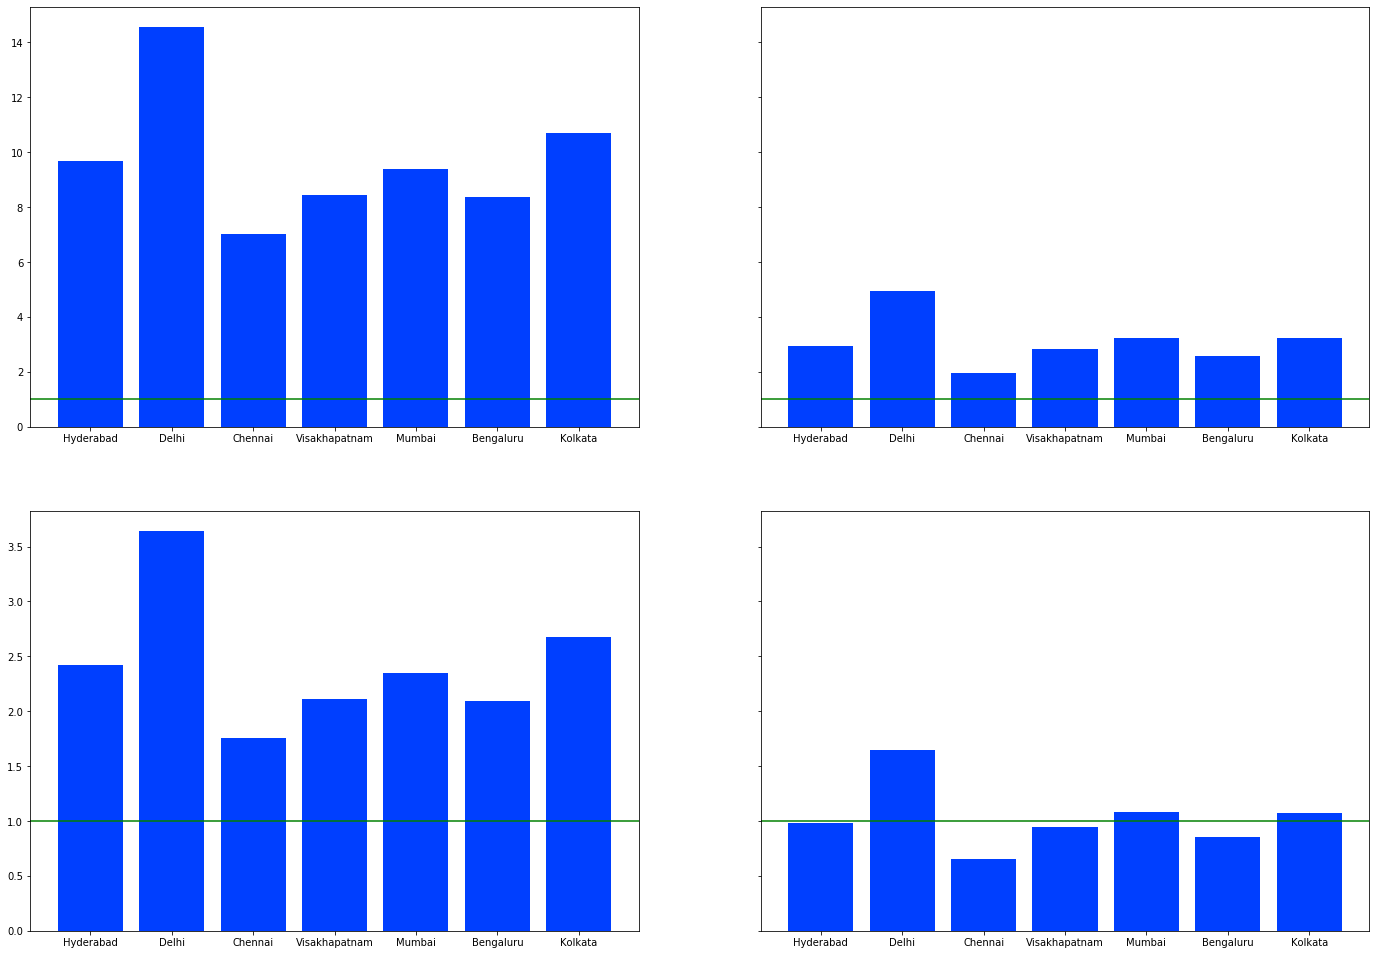

In [66]:
# plot 'em!

mean_pm25_r0 = [v[0]/pollutant_am_who['pm25'] for v in am_by_city.values()]
mean_pm10_r0 = [v[1]/pollutant_am_who['pm10'] for v in am_by_city.values()]
mean_pm25_r1 = [v[0]/pollutant_am_naaqs['pm25'] for v in am_by_city.values()]
mean_pm10_r1 = [v[1]/pollutant_am_naaqs['pm10'] for v in am_by_city.values()]
# just s we have the right sequence...
cities_in = [k for k in am_by_city.keys()]


fig, ax = plt.subplots(2, 2, figsize=(24, 17), sharey='row')
# ratio of pm10annual mean w.r.t. who standard
ax[0][0].bar(cities_in, mean_pm25_r0)
ax[0][0].axhline(y=1, c='g')
# ratio of pm2.5 annual mean w.r.t. who standard
ax[0][1].bar(cities_in, mean_pm10_r0)
ax[0][1].axhline(y=1, c='g')

# ratio of pm2.5 annual mean w.r.t. naaqs standard
ax[1][0].bar(cities_in, mean_pm25_r1)
ax[1][0].axhline(y=1, c='g')
# ratio of pm2.5 annual mean w.r.t. naaqs standard
ax[1][1].bar(cities_in, mean_pm10_r1)
ax[1][1].axhline(y=1, c='g')
plt.show()
plt.close()